# Lab 4 - Regression Analysis

## Exercise 1 (4 Marks)
What linear regression equation best predicts statistics performance for the students assuming we have following data? <br>
If a student made an 80 on the test, what grade would we expect him to make in statistics? <br>
How well does the regression equation fit the data?

|Student |test_score |statistics_grade|
|--------|-----------|----------------|
|1|95|85|
|2|85|95|
|3|80|70|
|4|70|65|
|5|60|70|

**Note**<br>
• The above dataset is available in student_score.csv file <br>

**HINT**<br>
• Use panda library to load the csv file<br>
• Use stats in scipy library for the regression analysis

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

#libraries for regression analysis
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model

#Xi = scores on test
#Yi = statistic grades

df = pd.read_csv('Dataset student_score.csv')
df.columns = ['Student','test_score','statistics_grade']
df.head()


,Student,test_score,statistics_grade
0,1,95,85
1,2,85,95
2,3,80,70
3,4,70,65
4,5,60,70


In [2]:
x = df['test_score']
y = df['statistics_grade']

slope, intercept,r_value,p_value, std_err = stats.linregress(x,y)
print('---------------------------------')
print("slope:",slope,'\nintercept:', intercept,"\nr_value:",r_value,"\np_value:",p_value,"\nstd_err:",std_err)
print('---------------------------------')
#Linear regression equation: y = mx + b
# y = 0.64(80) + 26.78
student_grade = slope*(80) + intercept
print("If a student got 80 on the test, we expect him to get ",round(student_grade,2), " in statistics")


---------------------------------
slope: 0.6438356164383562 
intercept: 26.78082191780822 
r_value: 0.6930525298193004 
p_value: 0.19446749009400915 
std_err: 0.38664772840212874
---------------------------------
If a student got 80 on the test, we expect him to get  78.29  in statistics


<hr>

## Exercise 2 (1 Mark)
Plot linear regression line for the data given in Exercise-1 using matplotlib library

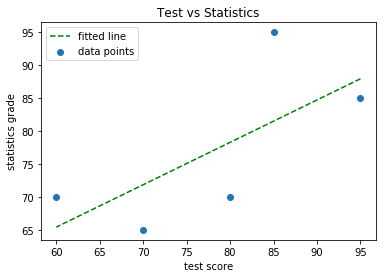

In [3]:
#Xi = scores on test
#Yi = statistic grades

x = np.array(df['test_score'])
x =x.reshape((-1,1)) #this array is required to be 2D (1 col with many rows)
y = np.array(df['statistics_grade'])
y = y.reshape((-1,1))

# model = LinearRegression()
# model.fit(x,y)
model = LinearRegression().fit(x,y)
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred,'--k',color='green',)
plt.title('Test vs Statistics')
plt.xlabel('test score')
plt.ylabel('statistics grade')
plt.legend(['fitted line','data points'],loc ="upper left")
plt.show()

# theres positive correlation 

<hr>

## Exercise 3 (1 Mark)
Measure the R-squared value, goodness-of-fit for Exercise-1 linear regression model


In [4]:
r_sq = model.score(x,y)
print('Coefficient of determination (R^2):',r_sq)
# print('intercept:',model.intercept_)
# print('slope',model.coef_)

Coefficient of determination (R^2): 0.4803218090889325


<hr>

## Exercise 4 (4 Mark)
Consider the following data:

`Y: [16,4,1,9,1,25,16,4,0,9,25]` <br>
`X: [-4,-2,1,3,-1,-5,4,2,0,-3,5]`


3.1) Visualize the scatter plot for the above data using matplotlib library <br>
3.2) What type of regression model is it?

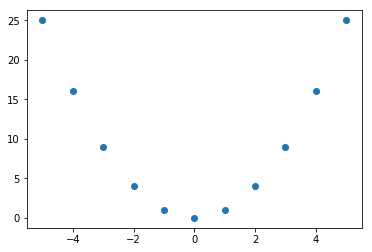

This is a polynomial regression model


In [5]:
y = [16,4,1,9,1,25,16,4,0,9,25]
x = [-4,-2,1,3,-1,-5,4,2,0,-3,5]

plt.scatter(x,y)
plt.show()

print("This is a Quadratic regression model")

<hr>

## Excercise-5 (9 Mark)

## 1.
In this part you will use Python to analyze the heart disease data set (the link and explanation is included here) by training and building a model with regression analysis.<br><br>
Test your model and discuss the result of your test with performance metrics. Make sure you `separate` training set and testing data properly. <br><br>
Then analyse the input data and explain which of them have `more effects on output` and modify your models by `eliminating non significant variables`. (5 marks) 

<br>
<b>Heart Disease Dataset:</b> Here, is the link for heart disease dataset of patients. <a>http://archive.ics.uci.edu/ml/datasets/Heart+Disease</a> 
<br>
After going to this link you will find two folders: 
<li>One: Data Folder</li> 
<li>two: Dataset description.</li> </em> It is better to use processed cleveland data. 
<br>
<br>
In the dataset description folder, you will find the description about the columns’ names referring to the 14 column of the dataset as the following: <strong>The last one attribute (number 14) is the result. </strong> Include your R source code of regression analysis, training and generating results. Here are the example of attributes and their Information (please see data set documents for more details)

<ol>
<li> #3 (age) </li>
<li> #4 (sex) </li>
<li> #9 (cp) </li>
<li> #10 (trestbps)</li> 
<li> #12 (chol)</li>
<li> #16 (fbs) </li>
<li> #19 (restecg) </li>
<li> #32 (thalach) </li>
<li> #38 (exang) </li>
<li> #40 (oldpeak)</li>
</ol> .........
<li>13. #51 (thal)</li>  
<li>14. #58 (num)</li>  
<br>
--------------------------->result <br>For more information related to this assignment you can read Chapter 2 and Linear Regression section of Chapter 3 of "Doing Data Science" book.

In [6]:
#read in heart disease data
heartDiseaseData = pd.read_csv('Dataset heart-disease-dataset.csv')
heartDiseaseData.describe()

,age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,result
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Data Cleaning

In [7]:
print("Number of missing data:",heartDiseaseData.isna().any().sum())
print("Number of duplicate data:",heartDiseaseData.duplicated().sum())

Number of missing data: 0
Number of duplicate data: 0


In [8]:
heartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null int64
sex        303 non-null int64
cp         303 non-null int64
tresbps    303 non-null int64
chol       303 non-null int64
fbs        303 non-null int64
restecg    303 non-null int64
thalach    303 non-null int64
exang      303 non-null int64
oldpeak    303 non-null float64
slope      303 non-null int64
ca         303 non-null object
thal       303 non-null object
result     303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


In [9]:
print(heartDiseaseData['ca'].unique())
print(heartDiseaseData['thal'].unique())

['0' '3' '2' '1' '?']
['6' '3' '7' '?']


In [10]:
#replacing all the '?' to 0
heartDiseaseData = heartDiseaseData.replace('?',0)
#change object type to int
heartDiseaseData['thal'] = heartDiseaseData['thal'].astype(int)
heartDiseaseData['ca'] = heartDiseaseData['ca'].astype(int)


In [11]:
#NOT INCLUDING ROWS THAT CONTAIN '?' 
# heartDiseaseData = heartDiseaseData[(heartDiseaseData.thal == '?') == False]
# heartDiseaseData = heartDiseaseData[(heartDiseaseData.ca == '?') == False]

### Heat Map

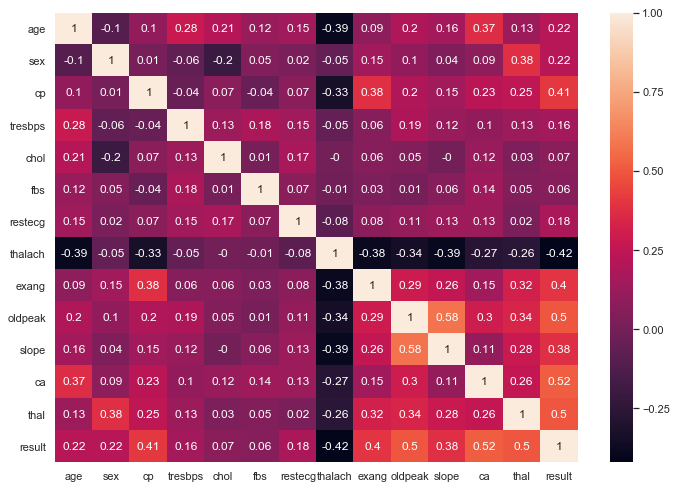

In [12]:
correlation_matrix = heartDiseaseData.corr().round(2)
sb.set(rc ={'figure.figsize':(11.7,8.27)})
sb.heatmap(data=correlation_matrix,annot=True)

## Linear Regression

### Split Data from X and Y

In [13]:
Y = heartDiseaseData['result']
Y = np.array(Y).reshape(-1,1)

#basesd on heatmap, ca has the highest correlation of 0.52
#so we use this as the variable we want to compare with result
X = heartDiseaseData['ca'] 
X = np.array(X).reshape(-1,1)

#Import library
from sklearn.model_selection import train_test_split
#perform 80 (training set)/20 (testing) split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=5)

### Data Dimension
doing this to confirm that its actually split between 80% and 20%

In [14]:
X_train.shape, Y_train.shape

((242, 1), (242, 1))

In [15]:
X_test.shape, Y_test.shape

((61, 1), (61, 1))

### Define the regression model

In [16]:
model = linear_model.LinearRegression()
# defining the input for the model building
model.fit(X_train,Y_train)
#Apply trained model to make prediction (on test set)
Y_pred= model.predict(X_test)

#Print Model Performance
print("Model Performance")
print("-------------------------------------")
print("Coeficients:",model.coef_)
print('Intercept:',model.intercept_)
mse = mean_squared_error(Y_test,Y_pred)
r = round(model.score(X_test,Y_test),2)
print("MSE is {}".format(mse))
print("R-Squared score is {}".format(r))

print('\nbased on R^2, linear regression seems to be bad for prediction')

Model Performance
-------------------------------------
Coeficients: [[0.68378674]]
Intercept: [0.54268293]
MSE is 0.8865631972584199
R-Squared score is 0.28

based on R^2, linear regression seems to be bad for prediction


### Make Scatter plot

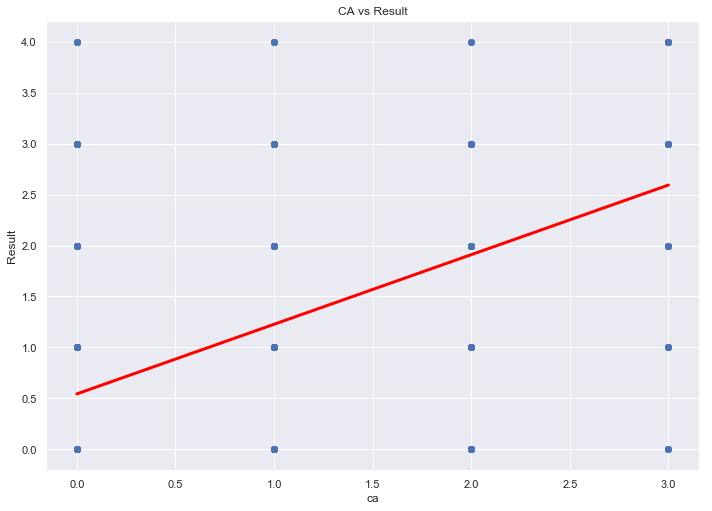

In [17]:
#sb.scatterplot(y_test,Y_pred, marker = "+",alpha =0.5)
prediction_space = np.linspace(min(X),max(X)).reshape(-1,1)
plt.scatter(X,Y)
plt.plot(prediction_space, model.predict(prediction_space),color='red',linewidth = 3)
plt.title("CA vs Result")
plt.ylabel('Result')
plt.xlabel('ca')
plt.show()

As you can see from the scatterplot, linear regression is not suitable

<hr>

## Multiple Regression

In [18]:
Y = heartDiseaseData['result']
X = heartDiseaseData.drop('result',axis=1) #drop last column
#axis = 1 (side by side) axis = 0 (stacked)
X_train_1, X_test_1, Y_train_1,Y_test_1 = train_test_split(X,Y, test_size=0.2,random_state=5)
lr = linear_model.LinearRegression()
lr.fit(X_train_1,Y_train_1)
Y_pred_1 = lr.predict(X_test_1)

mse = mean_squared_error(Y_test_1,Y_pred_1)
r = round(lr.score(X_test_1,Y_test_1),2)

print("The Model Performance")
print("-------------------------------------")
print("MSE is {}".format(mse))
print("R-Squared score is {}".format(r))
print("\n")

# Summarize feature importance score > 0.05
print("Important Features")
for i,v in enumerate(lr.coef_):
    if(v > 0.05):
        print("Feature: %0d, Score: %.5f" %(i,v))


The Model Performance
-------------------------------------
MSE is 0.5094268885785452
R-Squared score is 0.59


Important Features
Feature: 1, Score: 0.19796
Feature: 2, Score: 0.22164
Feature: 5, Score: 0.06498
Feature: 6, Score: 0.09898
Feature: 8, Score: 0.21159
Feature: 9, Score: 0.18044
Feature: 10, Score: 0.18825
Feature: 11, Score: 0.45733
Feature: 12, Score: 0.12380


In [19]:
heartDiseaseData.columns

Index(['age', 'sex', 'cp', 'tresbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'result'],
      dtype='object')

Based on the Coefficients, we can see that the `slope`, followed by `thalach,exang` and `age` has the most effect on the results. <br>
The Insignificant variables are `sex` and `fbs`

### Drop insignificant Variables

In [20]:
X = heartDiseaseData.drop(['sex','fbs'],axis=1)

X_train_1, X_test_1, Y_train_1,Y_test_1 = train_test_split(X,Y, test_size=0.2,random_state=5)
lr = linear_model.LinearRegression()
lr.fit(X_train_1,Y_train_1)
Y_pred_1 = lr.predict(X_test_1)

mse = mean_squared_error(Y_test_1,Y_pred_1)
r = round(lr.score(X_test_1,Y_test_1),2)

print("The Model Performance")
print("-------------------------------------")
print("MSE is {}".format(mse))
print("R-Squared score is {}".format(r))

The Model Performance
-------------------------------------
MSE is 3.907609845985759e-30
R-Squared score is 1.0


In [21]:
print("The variables that were dropped: 'sex' and 'fbs'")
print('----------------------------------------------------')
print("Before dropping insignificant variables:\nMSE is 0.5737656565566979 \nR-Squared score is 0.52")
print("\nAfter dropping insignificant variables:\nMSE is 7.050526275434662e-30 \nR-Squared score is 1.0")

The variables that were dropped: 'sex' and 'fbs'
----------------------------------------------------
Before dropping insignificant variables:
MSE is 0.5737656565566979 
R-Squared score is 0.52

After dropping insignificant variables:
MSE is 7.050526275434662e-30 
R-Squared score is 1.0


When we take out the insignificant variables, R^2 is significantly better!

<hr>

## 2. Nonlinear models (4 marks)
In this part you will use the heart disease data set to analyse the data with `logistic regression analysis` ( or any other nonlinear classifier on your choice) and compare with `linear regression analysis` then answering which method is better. First use two models as the estimator (with numerical result). 
<br><br>
Here you need to compare both methods by calculating Errors such as `Mean Square Error (MSE)` and other performance metrics `(R-squared)` to find which method can do prediction more accurately. Make sure you separate training set and testing data and there is no overfitting.

### Logistic Regression

In [22]:
Y = heartDiseaseData['result']
X = heartDiseaseData.drop('result',axis=1) #drop last column

X_train_1, X_test_1, Y_train_1,Y_test_1 = train_test_split(X,Y, test_size=0.2,random_state=5)

#use logistic regression here 
lr = linear_model.LogisticRegression(max_iter=10000)
lr.fit(X_train_1,Y_train_1)
Y_pred_1 = lr.predict(X_test_1)

mse = mean_squared_error(Y_test_1,Y_pred_1)
r = round(lr.score(X_test_1,Y_test_1),2)

print("The Model Performance")
print("-------------------------------------")
print("MSE is {}".format(mse))
print("R-Squared score is {}".format(r))
print("\n")

The Model Performance
-------------------------------------
MSE is 0.7868852459016393
R-Squared score is 0.69




/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Regression Model Comparisons 

||Linear|Multiple|Logistic|
|--------|-----------|----------------|----------------|
|MSE|0.89|0.51|0.79|
|R^2|0.28|0.59|0.69|

<br>*this is without removing insignigicant variables*
<br>
<br>
*Linear Regression we are testing 'ca' and result since 'ca' has the highest coefficient amongst all the other variables in the heatmap

Based on the cacluations, **logistic method** is better!

<hr>

## Exercise-6 (1 Mark)
Download the Excel file <em>“Sample-probability-distributions-graph.xlsx”</em> of the sample distributions from the lecture notes.
<br><br> By visual observation and running the regression analysis (for example by Excel regression analysis) find out which `probability distribution` is `linear`. You can examine <strong>fitting the distribution data</strong> by using `linear regression model` or by `explaining the equation` of each distribution.

<img src="https://cdn.discordapp.com/attachments/932827140691464223/944041910803251211/ex6.png" width=70% alt="Excel Graph">


After plotting all the data we can see that normal distribution is closest to being 'linear'. This is because it's R^2 value is closest to 1.

`Got this question wrong`